In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from scipy.stats import skew, skewtest
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline

In [3]:
train = pd.read_csv('./data//train.csv')
numeric_feats = train.dtypes[train.dtypes != "object"].index

In [10]:
# define plot function, and in this function, we will calculate the skew of X and take the log1p of y
def plot_outlier(x,y):
    tmp=x.dropna()
    skew_value=skew(tmp)
    y=np.log1p(y)
    print(skewtest(tmp))
    print('sample length: %s   and skew: %s'%(len(x),skew_value))
    fig,axs=plt.subplots(1,2,figsize=(8,3))
    sns.boxplot(x,orient='v',ax=axs[0])
    sns.regplot(x,y,ax=axs[1])
    plt.tight_layout()

SkewtestResult(statistic=19.845217410412243, pvalue=1.212032173782375e-87)
sample length: 1460   and skew: 2.160865994705543


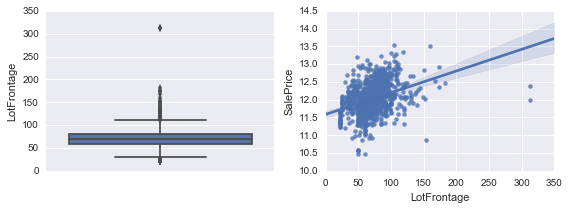

In [11]:
# LotFrontage
plot_outlier(train.LotFrontage,train.SalePrice)

SkewtestResult(statistic=-9.3415795461345592, pvalue=9.4907516524941023e-21)
sample length: 1460   and skew: -0.7278173750163186


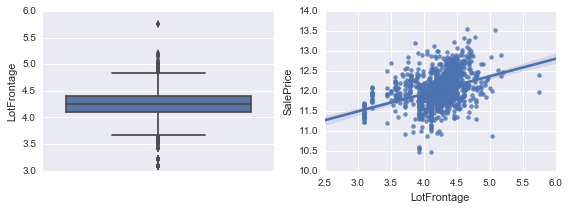

In [13]:
# LotFrontage
plot_outlier(np.log1p(train.LotFrontage),train.SalePrice)

SkewtestResult(statistic=5.2199165200575646, pvalue=1.7900379884851765e-07)
sample length: 1460   and skew: 0.3789137208901214


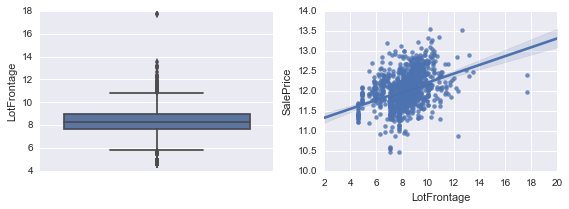

In [17]:
# LotFrontage
plot_outlier(np.sqrt(train.LotFrontage),train.SalePrice)

SkewtestResult(statistic=-2.9504191693472874, pvalue=0.0031734306844319687)
sample length: 1460   and skew: -0.20945576348625186


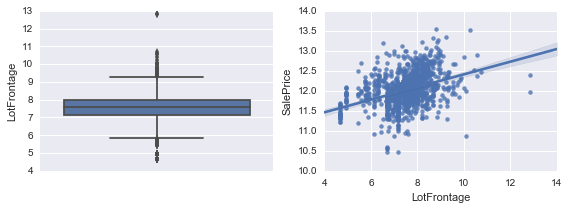

In [29]:
# LotFrontage
plot_outlier(boxcox1p(train.LotFrontage, 0.25),train.SalePrice)